In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [2]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 5

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
"Monkey Pox",
shuffle = True,
image_size = (IMAGE_SIZE,IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 663 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names
class_names

['Measles', 'Monkeypox', 'Normal']

(32, 256, 256, 3)
[0 2 2 1 2 2 1 1 2 2 2 1 1 2 2 1 1 1 1 1 2 2 2 1 2 2 1 2 2 2 1 2]


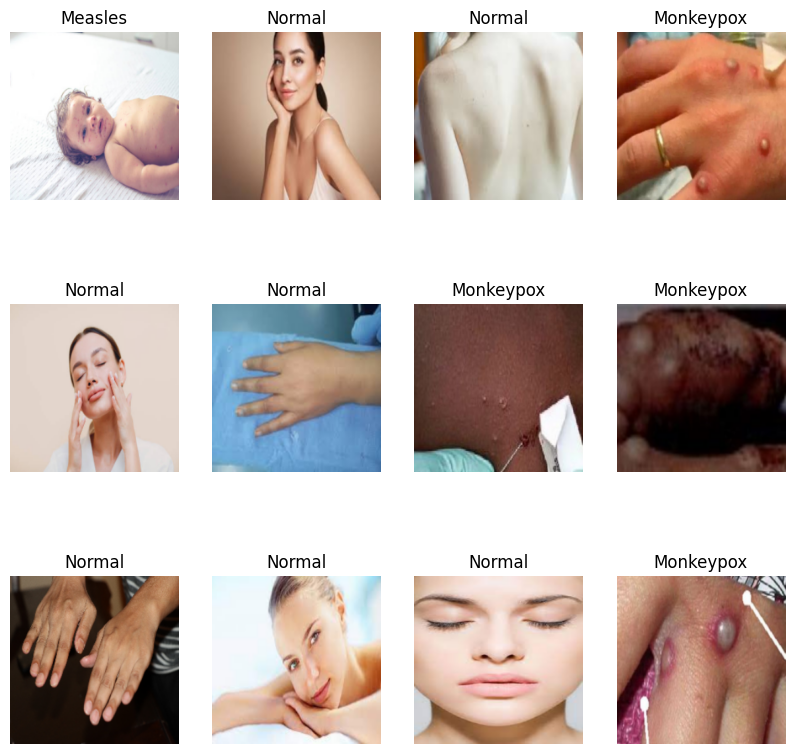

In [6]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.title(class_names[labels_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
#80% ==> Training
#20% ==> Test
    #10% ==> Validation
    #10% ==> Test

In [8]:
train_size = 0.8
len(dataset)*train_size

16.8

In [9]:
train_ds = dataset.take(16)
len(train_ds)

16

In [10]:
test_ds = dataset.skip(16)
len(test_ds)

5

In [11]:
val_size = 0.1
len(dataset)*val_size

2.1

In [12]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [13]:
test_ds = test_ds.skip(2)
len(test_ds)

3

In [14]:
def get_dataset_partition_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split)==1
    
    ds_size= len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partition_tf(dataset)

In [16]:
len(train_ds)

16

In [17]:
len(val_ds)

2

In [18]:
len(test_ds)

3

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.         0.         0.01568628]
  [0.         0.         0.0125    ]
  [0.         0.         0.00637255]
  ...
  [0.36519608 0.17279412 0.24313726]
  [0.34754902 0.16323529 0.24166666]
  [0.34117648 0.15686275 0.23529412]]

 [[0.         0.         0.01568628]
  [0.         0.         0.0125    ]
  [0.         0.         0.00637255]
  ...
  [0.37356004 0.18016237 0.2505055 ]
  [0.36089155 0.17398897 0.25242034]
  [0.35710785 0.17279412 0.2512255 ]]

 [[0.         0.         0.01568628]
  [0.         0.         0.0125    ]
  [0.         0.         0.00637255]
  ...
  [0.38340992 0.19163603 0.2592831 ]
  [0.37846202 0.1904565  0.26619178]
  [0.37965685 0.19264705 0.26838234]]

 ...

 [[0.6754902  0.46642157 0.44289216]
  [0.680867   0.46960783 0.44607842]
  [0.6901961  0.4757353  0.45490196]
  ...
  [0.5786458  0.3572457  0.345481  ]
  [0.5712929  0.360049   0.35171568]
  [0.57009804 0.35686275 0.35171568]]

 [[0.68921566 0.47671568 0.45392156]
  [0.6918045  0.47930452 0.45651042]


In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
    
    
])

model.build(input_shape = input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                  

In [25]:
X = train_ds
y= test_ds

In [26]:
model.compile(
   optimizer='adam', 
   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
   metrics=['accuracy']
)
 


In [27]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/5
16/16 [==============================] - 19s 497ms/step - loss: 1.0077 - accuracy: 0.4314 - val_loss: 0.9859 - val_accuracy: 0.4909
Epoch 2/5
16/16 [==============================] - 5s 317ms/step - loss: 0.9610 - accuracy: 0.4612 - val_loss: 1.1231 - val_accuracy: 0.3818
Epoch 3/5
16/16 [==============================] - 5s 311ms/step - loss: 0.9297 - accuracy: 0.5924 - val_loss: 1.0143 - val_accuracy: 0.5091
Epoch 4/5
16/16 [==============================] - 5s 319ms/step - loss: 0.8523 - accuracy: 0.6342 - val_loss: 0.9498 - val_accuracy: 0.4909
Epoch 5/5
16/16 [==============================] - 5s 325ms/step - loss: 0.8259 - accuracy: 0.6541 - val_loss: 1.1114 - val_accuracy: 0.4909


In [28]:
scores = model.evaluate(test_ds)

3/3 [==============================] - 1s 78ms/step - loss: 0.6933 - accuracy: 0.6979


In [29]:
history.history['accuracy']

[0.4314115345478058,
 0.46123260259628296,
 0.5924453139305115,
 0.6341948509216309,
 0.654075562953949]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

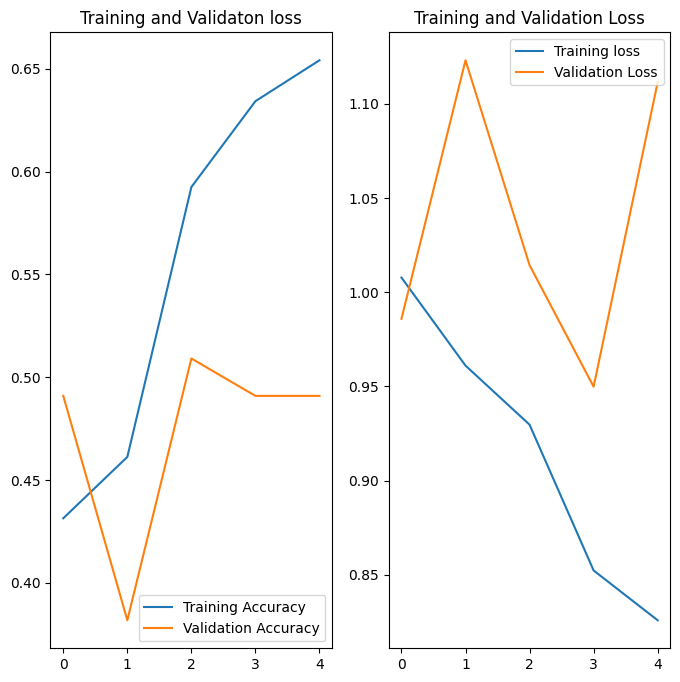

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validaton loss')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss,label='Training loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict
Label: Normal
1/1 [==============================] - 1s 669ms/step
Predicted Label: Normal


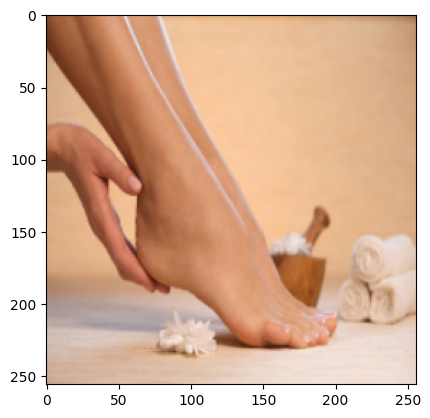

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype("uint8")
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Label:", class_names[labels_batch[0].numpy()])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
yhat_probs = model.predict(test_ds, verbose=0)

In [34]:
yhat_classes = np.argmax(model.predict(test_ds), axis=-1)

3/3 [==============================] - 0s 65ms/step


In [35]:
yhat_probs = yhat_probs[:, 0]

In [36]:
yhat_classes = yhat_classes[:, 0]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
acc = [0 for c in class_names]
for c in class_names:
    acc[c] = ((preds == labels) * (labels == c)).float() / (max(labels == c).sum(), 1))

In [57]:
import pandas as pd

In [62]:
import numpy as np
from keras.preprocessing import image

In [63]:
predictions = classifier.predict(iamges_batch)

NameError: name 'classifier' is not defined

In [58]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7001, 0.6621, 0.0291],
        [0.1200, 0.1090, 0.0788],
        [0.6020, 0.1696, 0.9602],
        [0.0657, 0.9207, 0.4817],
        [0.4374, 0.9221, 0.7947]])


In [59]:
dataframe = pd.DataFrame(cf_matrix, index=class_names, columns=class_names)


NameError: name 'cf_matrix' is not defined

In [92]:
from sklearn.model_selection import train_test_split

In [95]:
 Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, test_size=0.2, random_state=42)

TypeError: Singleton array array(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
      dtype=object) cannot be considered a valid collection.

In [91]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model
loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

NameError: name 'Xtrain' is not defined